<a href="https://colab.research.google.com/github/Varshitha-bit/nlp/blob/main/Assignment4(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: TF-IDF Analysis of Research Abstracts

Activities:

o Load abstracts from one research category.

o Clean text (remove numbers, punctuation).

o Compute TF-IDF for all abstracts.

o Identify:

o Top 20 terms across the corpus

o Visualize:

o Word cloud using TF-IDF weights

o Heatmap of TF-IDF scores for top 10 terms across 5 documents

o Expected Output

o TF-IDF feature list

o Word cloud

o Heatmap visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

# **Connecting drive**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Reading file**

In [4]:
import pandas as pd

path = '/content/drive/My Drive/datasets/'
file_path = path + 'abstract.csv'

raw_text = pd.read_csv(file_path)

# **Cleaning**

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv(file_path)
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())

cs_mask = df['terms'].str.contains('cs', case=False, na=False)
df_cs = df[cs_mask].head(1000).copy()  # Small subset
print(f"CS papers loaded: {len(df_cs)}")

def clean_abstract(text):
    if pd.isna(text):
        return ""

    # Step 1: Remove numbers (as per assignment)
    text = re.sub(r'\d+', '', text)

    # Step 2: Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Convert to lowercase
    text = text.lower()

    # Step 4: Remove extra whitespace
    text = ' '.join(text.split())

    # Step 5: Remove stopwords (optional but recommended)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# Apply cleaning
print("Cleaning abstracts...")
df_cs['clean_summaries'] = df_cs['summaries'].apply(clean_abstract)

# Remove empty abstracts
df_cs = df_cs[df_cs['clean_summaries'].str.len() > 0]
print(f"After cleaning: {len(df_cs)} documents")

# Display before/after
print("\nSample before/after cleaning:")
for i in range(3):
    print(f"\nDoc {i+1}:")
    print("Original:", df_cs['summaries'].iloc[i][:100], "...")
    print("Cleaned: ", df_cs['clean_summaries'].iloc[i][:100], "...")

# Ready for TF-IDF
abstracts_clean = df_cs['clean_summaries'].tolist()
print(f"\nReady: {len(abstracts_clean)} cleaned abstracts")

Original shape: (51774, 3)
Columns: ['titles', 'summaries', 'terms']
CS papers loaded: 1000
Cleaning abstracts...
After cleaning: 1000 documents

Sample before/after cleaning:

Doc 1:
Original: Stereo matching is one of the widely used techniques for inferring depth from
stereo images owing to ...
Cleaned:  stereo matching one widely used techniques inferring depth stereo images owing robustness speed beco ...

Doc 2:
Original: The recent advancements in artificial intelligence (AI) combined with the
extensive amount of data g ...
Cleaned:  recent advancements artificial intelligence combined extensive amount data generated todays clinical ...

Doc 3:
Original: In this paper, we proposed a novel mutual consistency network (MC-Net+) to
effectively exploit the u ...
Cleaned:  paper proposed novel mutual consistency network mcnet effectively exploit unlabeled hard regions sem ...

Ready: 1000 cleaned abstracts


# **Compute TF-IDF**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer (default settings: min_df=1, max_features=None)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features
tfidf_matrix = vectorizer.fit_transform(df_cs['clean_summaries'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# TF-IDF DataFrame for analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

print("TF-IDF shape:", tfidf_matrix.shape)
print("Sample TF-IDF matrix:")
print(tfidf_df.iloc[:3, :5])  # First 3 docs, first 5 terms

TF-IDF shape: (1000, 1000)
Sample TF-IDF matrix:
   abdominal  ability  able  access  according
0        0.0      0.0   0.0     0.0        0.0
1        0.0      0.0   0.0     0.0        0.0
2        0.0      0.0   0.0     0.0        0.0


# **Top 20 terms across the corpus**

In [12]:
term_scores = np.sum(tfidf_matrix, axis=0).A1
top_indices = np.argsort(term_scores)[-20:][::-1]

print("Top 20 terms across corpus:")
top_terms = terms[top_indices]
for term in top_terms:
    print(term)


Top 20 terms across corpus:
segmentation
image
images
learning
method
network
data
model
medical
deep
proposed
training
methods
performance
using
results
semantic
networks
approach
based


# **Word cloud using TF-IDF weights**

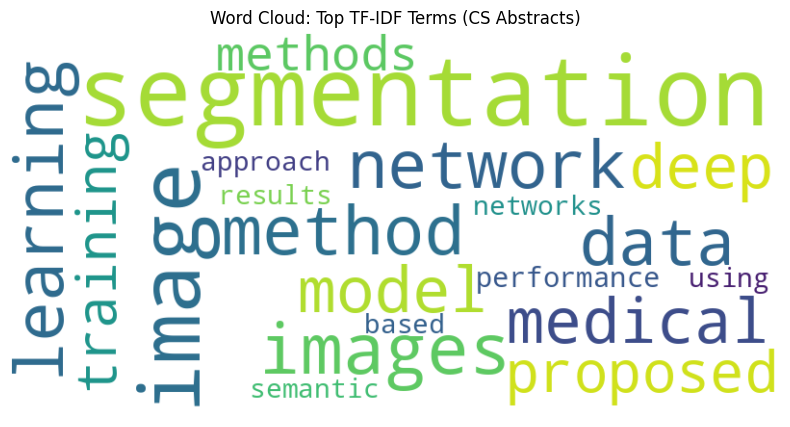

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of term frequencies/weights from top_terms and top_scores
word_freq = dict(zip(top_terms, top_scores))

# Generate the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Top TF-IDF Terms (CS Abstracts)')
plt.show()

# **Heatmap of TF-IDF scores for top 10 terms across documents**

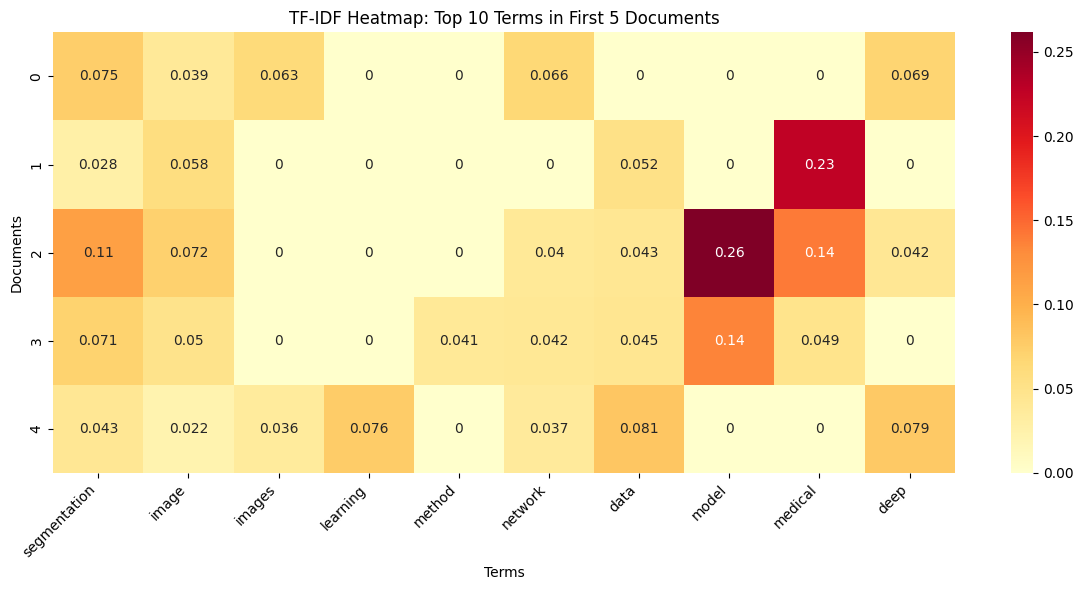

In [16]:
# Top 10 terms across first 5 documents
top10_indices = np.argsort(term_scores)[-10:][::-1]
top10_terms = terms[top10_indices]
heatmap_data = tfidf_df.iloc[:5, top10_indices]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', xticklabels=top10_terms, yticklabels=df_cs.index[:5]) # Changed 'df['id']' to 'df_cs.index'
plt.title('TF-IDF Heatmap: Top 10 Terms in First 5 Documents')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()